In [64]:
# run the command if qiskit is not installed in this jupyter notebook "pip install qiskit"

In [65]:
from qiskit import * 

In [66]:
circuit = QuantumCircuit(2,2)

In [67]:
quantum_register = QuantumRegister(2)
classical_register = ClassicalRegister(2)

In [68]:
#pip install matplotlib

In [69]:
#%matplotlib inline

In [70]:
circuit.draw()

q_0: 
     
q_1: 
     
c: 2/

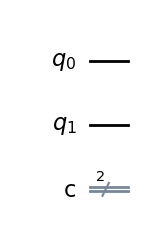

In [71]:
circuit.draw(output='mpl')

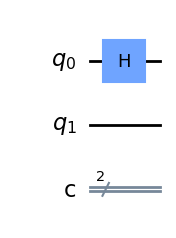

In [72]:
circuit.h(0)
circuit.draw(output='mpl')

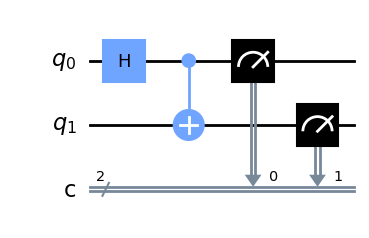

In [73]:
circuit.cx(0,1) # 0-> control qubit, 1-> target qubit
circuit.measure([0,1],[0,1])
circuit.draw(output='mpl')

In [74]:
simulator = Aer.get_backend('qasm_simulator')

In [75]:
result = execute(circuit, backend=simulator).result()

In [76]:
from qiskit.visualization import plot_histogram

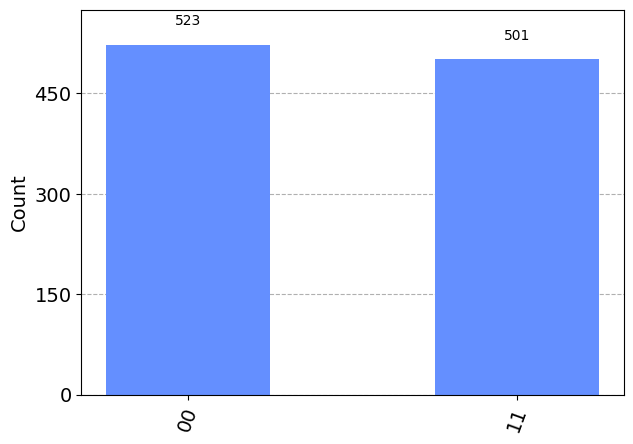

In [77]:
plot_histogram(result.get_counts(circuit))